# **DATA MINING AND WAREHOUSING -  MINI PROJECT**



# **ABSTRACT**
The dataset includes the description of certain samples of species of gilled mushrooms taken from North American Mushrooms in 1981. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended to be eaten which is  combined with the poisonous one.
So, there are two classes- Poisonous and Edible. Six classification models are used to predict. 

# **Content:**
## 1. Import Libraries
## 2. Load the Data
## 3. Variable Descriptions
## 4. Train-Test Split
## 5. Classification Models:-
###  i) Logistic Regression Model
###  ii) Naive Bayes Model
###  iii) Decision Tree Classification Model
###  iv) Random Tree Classification Model
###  v) K-Nearest Neighbors(K-NN) Model
## Results

## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Load Data**

In [ ]:
df = pd.read_csv('/content/mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


## **Display Information About the Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## **Percentages of Edible and Poisonous mushrooms.**

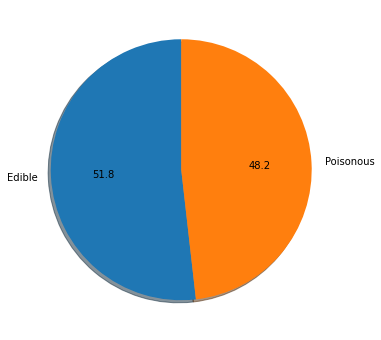

In [ ]:
plt.figure(figsize = (6,6))
plt.pie(df['class'].value_counts(), startangle = 90, autopct = '%.1f', labels = ['Edible', 'Poisonous'], shadow = True)
plt.show()

### Set Dependent and Independent variable

In [ ]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

## **Check if there is null value**

In [ ]:
df.notnull().all()

class                       True
cap-shape                   True
cap-surface                 True
cap-color                   True
bruises                     True
odor                        True
gill-attachment             True
gill-spacing                True
gill-size                   True
gill-color                  True
stalk-shape                 True
stalk-root                  True
stalk-surface-above-ring    True
stalk-surface-below-ring    True
stalk-color-above-ring      True
stalk-color-below-ring      True
veil-type                   True
veil-color                  True
ring-number                 True
ring-type                   True
spore-print-color           True
population                  True
habitat                     True
dtype: bool

# **Encoding Categorical Data**
###    1) Independent Variable

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X = df.iloc[:, 1:].apply(le.fit_transform).values

###      2) Dependent Variable

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = np.array(le.fit_transform(y))
y.reshape(len(y), 1)

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

## **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## **Classification Models**

Accuracy

In [ ]:
accuracies = dict()

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

#Make Prediction
y_pred = lr.predict(X_test)

from sklearn.metrics import accuracy_score

accuracies['Logistic Regression'] = accuracy_score(y_test, y_pred)
print('Accuracy is: ' + str(accuracy_score(y_test, y_pred)))

Accuracy is: 0.9556923076923077


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**Plot Confusion Matrix**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


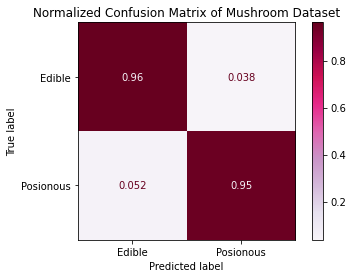

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr, X_test, y_test,display_labels=['Edible', 'Posionous'],cmap= plt.cm.PuRd, normalize= 'true')
plt.title("Normalized Confusion Matrix of Mushroom Dataset")
plt.show()

# **Naive Bayes**
This is a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.

In [ ]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

#Make Prediction
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score

accuracies['Naive Bayes'] = accuracy_score(y_test, y_pred)
print('Accuracy is: ' + str(accuracy_score(y_test, y_pred)))

Accuracy is: 0.9156923076923077


**Plot Confusion Matrix**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


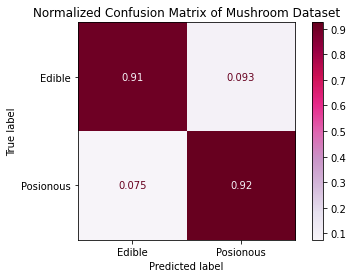

In [ ]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(classifier, X_test, y_test, display_labels= ['Edible', 'Posionous'], cmap = plt.cm.PuRd, normalize= 'true')
plt.title("Normalized Confusion Matrix of Mushroom Dataset")
plt.show()

# **Decision Tree Classification**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state= 0)
classifier.fit(X_train, y_train)

#Make Prediction
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score

accuracies['Decision Tree Classification'] = accuracy_score(y_test, y_pred)
print('Accuracy is: ' + str(accuracy_score(y_test, y_pred)))

Accuracy is: 1.0


**Plot Confusion Matrix**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


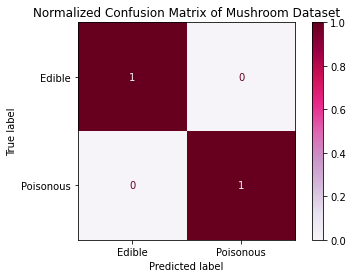

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_test, y_test, display_labels= ['Edible', 'Poisonous'], cmap = plt.cm.PuRd, normalize= 'true')
plt.title("Normalized Confusion Matrix of Mushroom Dataset")
plt.show()

# **Random Tree Classification**
It is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators= 2, random_state= 0)
classifier.fit(X_train, y_train)

#Make Prediction
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score

accuracies['Random Tree Classification'] = accuracy_score(y_test, y_pred)
print('Accuracy is: ' + str(accuracy_score(y_test, y_pred)))

Accuracy is: 1.0


**Plot Confusion Matrix**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


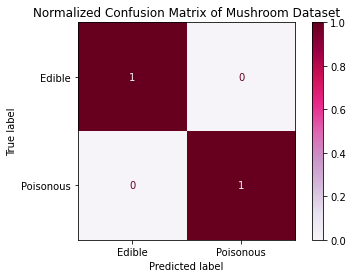

In [ ]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(classifier, X_test, y_test, display_labels= ['Edible', 'Poisonous'], cmap = plt.cm.PuRd, normalize= 'true')
plt.title("Normalized Confusion Matrix of Mushroom Dataset")
plt.show()

# **K-Nearest Neighbors(K-NN)**
In this, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). The output is the property value for the object. This value is the average of the values of k nearest neighbors.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

#Make Prediction
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score

accuracies['K-Nearest Neighbors'] = accuracy_score(y_test, y_pred)
print('Accuracy is: ' + str(accuracy_score(y_test, y_pred)))

Accuracy is: 0.9969230769230769


**Plot Confusion Matrix**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


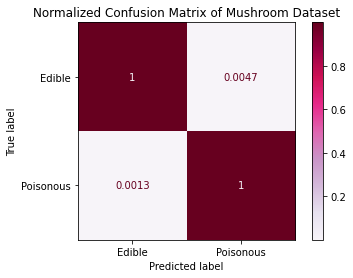

In [ ]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(classifier, X_test, y_test, display_labels= ['Edible', 'Poisonous'], cmap = plt.cm.PuRd, normalize= 'true')
plt.title("Normalized Confusion Matrix of Mushroom Dataset")
plt.show()


# **Results of Accuracy**

In [ ]:
accuracy_df  = pd.DataFrame(list(accuracies.items()),columns = ['Model Name', 'Accuracy Score']) 
accuracy_df

,Model Name,Accuracy Score
0,Logistic Regression,0.955692
1,Naive Bayes,0.915692
2,Decision Tree Classification,1.000000
3,Random Tree Classification,1.000000
4,K-Nearest Neighbors,0.996923


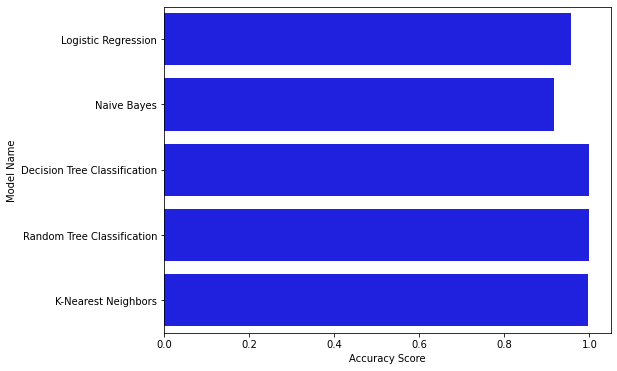

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.set_color_codes("pastel")
sns.barplot(y="Model Name", x="Accuracy Score", data = accuracy_df, color="blue")
plt.show()